# Fourier transform handling units

In [1]:
import numpy as np
import physipy
from physipy import units, m, s, setup_matplotlib
setup_matplotlib()
import matplotlib.pyplot as plt
import scipy.signal


In [2]:
W = units["W"]
ms = units["ms"]

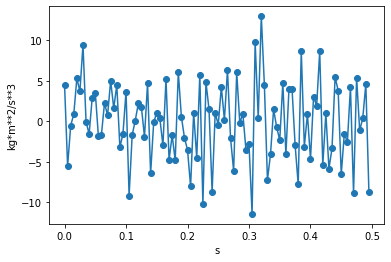

In [3]:
dt = 5*ms
fs = 1/dt
# signal is a noise with unit W
n = 100
sig = 5*np.random.randn(n)*W
sig.favunit = W
sig -= np.mean(sig)
ech_t = np.linspace(0, n-1, num=n)*dt

fig, ax = plt.subplots()
ax.plot(ech_t, sig, "-o")

In [4]:
print(np.std(sig))
print(np.var(sig))

4.793753357234533 kg*m**2/s**3
22.980071249997355 kg**2*m**4/s**6


Fourier transform of a signal has the same unit : 
$$X[k] = \sum_n^{N-1} x[k] e^{-i2\pi k n /N }$$

In [5]:
tf = np.fft.fft(sig, norm="ortho")
print(sig.dimension == tf.dimension)

True


Note that several versions of numpy's fft are available : 
 - `norm=backward` : $X[k]=\sum x[k]e^{-2ikn/N}$
 - `norm=forward` : $X[k]=\frac{1}{N}\sum x[k]e^{-2ikn/N}$
 - `norm=ortho`: $X[k]=\frac{1}{\sqrt{N}}\sum x[k]e^{-2ikn/N}$

In [6]:
sig_test = np.ones(10)
print(np.sum(np.fft.fft(sig_test, norm="backward")))
print(np.sum(np.fft.fft(sig_test, norm="forward")))
print(np.sum(np.fft.fft(sig_test, norm="ortho")))

print(np.fft.fft(sig, norm="ortho").dimension)
print(np.fft.fft(sig, norm="backward").dimension)
print(np.fft.fft(sig, norm="forward").dimension)

(10+0j)
(1+0j)
(3.1622776601683795+0j)
L**2*M/T**3
L**2*M/T**3
L**2*M/T**3


# Modulus
The modulus of a Fourier transform shall then have the squared unit

In [7]:
mod2 = np.real(tf * np.conjugate(tf))
print(mod2.dimension == tf.dimension**2)

True


# Frequencies

Given a sampling period, in second for eg, the sampling frequency is used to compute the frequencies for the fourier transform : 

In [8]:
dt = 5*s
fs = 1/dt
freqs = np.fft.fftfreq(len(mod2), d=dt)
print(freqs.dimension)
print(freqs)

1/T
[ 0.     0.002  0.004  0.006  0.008  0.01   0.012  0.014  0.016  0.018
  0.02   0.022  0.024  0.026  0.028  0.03   0.032  0.034  0.036  0.038
  0.04   0.042  0.044  0.046  0.048  0.05   0.052  0.054  0.056  0.058
  0.06   0.062  0.064  0.066  0.068  0.07   0.072  0.074  0.076  0.078
  0.08   0.082  0.084  0.086  0.088  0.09   0.092  0.094  0.096  0.098
 -0.1   -0.098 -0.096 -0.094 -0.092 -0.09  -0.088 -0.086 -0.084 -0.082
 -0.08  -0.078 -0.076 -0.074 -0.072 -0.07  -0.068 -0.066 -0.064 -0.062
 -0.06  -0.058 -0.056 -0.054 -0.052 -0.05  -0.048 -0.046 -0.044 -0.042
 -0.04  -0.038 -0.036 -0.034 -0.032 -0.03  -0.028 -0.026 -0.024 -0.022
 -0.02  -0.018 -0.016 -0.014 -0.012 -0.01  -0.008 -0.006 -0.004 -0.002] 1/s


# Plotting
Finally, we can easily plot the spectrum 

22.980071249997355 W**2


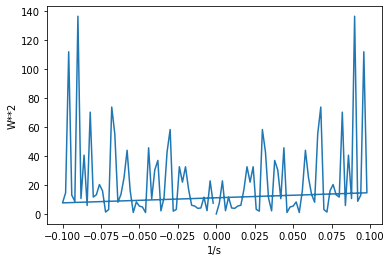

In [9]:
fig, ax = plt.subplots()
mod2.favunit = W**2
ax.plot(freqs, mod2)
print(np.mean(mod2))

# Frequency shift 

22.980071249997355 W**2


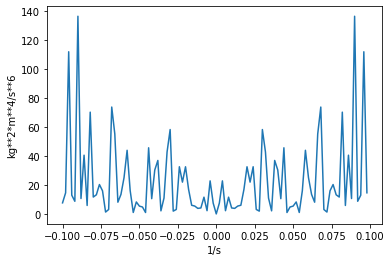

In [10]:
fig, ax = plt.subplots()
ax.plot(np.fft.fftshift(freqs), np.fft.fftshift(mod2))
print(np.mean(mod2))

# Energy conservation

$$Var(x) = \frac{1}{N}\sum_i x[i]^2 $$

In [11]:
print(np.var(sig))
print(np.var(sig)+np.mean(sig)**2)
print(np.sum(mod2)/len(mod2)**2) # for norm="backward", by default
print(np.sum(mod2)/len(mod2)) # for norm="ortho"
print(np.mean(sig**2))

22.980071249997355 kg**2*m**4/s**6
22.980071249997355 kg**2*m**4/s**6
0.22980071249997355 kg**2*m**4/s**6
22.980071249997355 kg**2*m**4/s**6
22.980071249997355 kg**2*m**4/s**6


In [12]:
tf = np.fft.fft(sig, norm="ortho")
mod2_ortho = np.real(tf * np.conjugate(tf))
tf = np.fft.fft(sig, norm="forward")
mod2_fw = np.real(tf * np.conjugate(tf))

print(np.sum(mod2)/len(mod2)**2)    # for norm="backward", by default
print(np.sum(mod2_ortho)/len(mod2)) # for norm="ortho"
print(np.sum(mod2_fw))              # for norm="forward"

0.22980071249997355 kg**2*m**4/s**6
22.980071249997355 kg**2*m**4/s**6
22.98007124999736 kg**2*m**4/s**6


# Scipy periodogram

## Simplest version


In [13]:
print(fs)

0.2 1/s


22.980071249997355 kg**2*m**4/s**6
0.39905108318244614
22.980071249997355 kg**2*m**4/s**6
37.125


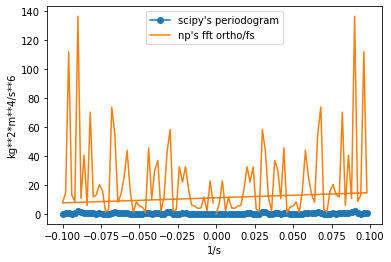

In [40]:
sig -= np.mean(sig)
f, pxx = scipy.signal.periodogram(sig, 
                                  fs=fs.value, # scale the frequencies, and also the spectrum if scaling="density"
                                  detrend="constant",  # False, "constant":remove mean, "linear"
                                  scaling="spectrum", # "spectrum":Pxx in V^2 with forward, "density":Pxx in V^2/Hz with ortho/fs
                                  return_onesided=False,
                                  window="hanning",
                                 )
fig, ax = plt.subplots()
ax.plot(f, pxx, "-o", label="scipy's periodogram")
#ax.plot(freqs, mod2, label="np's fft")
#ax.plot(freqs, mod2_fw, label="np's fft forward")
ax.plot(freqs, mod2_ortho,#/fs,
        label="np's fft ortho/fs")
print(np.var(sig))
print(np.mean(pxx))
print(np.mean(mod2_ortho))
#print(np.mean(mod2_ortho/fs))
w = np.hanning(len(sig))
print(np.sum(w**2))
ax.legend()

# Windows

0.37125
0.245025
1.5151515151515154
0.3712500000000001
2.693602693602693
1.6412198797244362


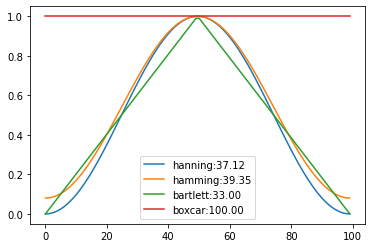

In [27]:
n = 100

windows = {"hanning":np.hanning,
           "hamming":np.hamming, 
           "bartlett":np.bartlett,
           "boxcar":np.ones}
fig, ax = plt.subplots()
for name, wf in windows.items():
    w = wf(n)
    ax.plot(w, label=f"{name}:{np.sum(w**2):.2f}")
ax.legend()

ratios = []
#s = np.random.randn(100)*2
s = np.ones(n)
#s -= np.mean(s)
w = np.hanning(len(s))
sw = s*w
#fig, ax = plt.subplots()
#ax.plot(s)
#ax.plot(sw)
#ax.plot(w)

tf = np.fft.fft(s, norm="ortho")
tfw = np.fft.fft(sw, norm="ortho")
mod2 = np.real(tf*np.conjugate(tf))
mod2w = np.real(tfw*np.conjugate(tfw))

ww = np.fft.fft(w)
ww2 = np.real(ww*np.conjugate(ww))

#fig, ax = plt.subplots()
#ax.plot(mod2)
#ax.plot(mod2w)
#ax.plot(mod2w/(ww2*ww2).mean())
#print(np.mean(ww2)**2)
#print((ww2*ww2).mean())

print(np.mean(w**2))
print(np.mean(w)**2)
print(np.mean(w**2)/np.mean(w)**2)
#print(np.mean(w)**2/np.mean(w**2))

#print(np.mean(mod2))
#print(np.var(s))

#print(np.mean(mod2w))
print(np.mean(mod2w)/np.mean(mod2))
print(1/(np.mean(mod2w)/np.mean(mod2)))
print(np.sqrt(1/(np.mean(mod2w)/np.mean(mod2))))

[0.37125    0.37107804]


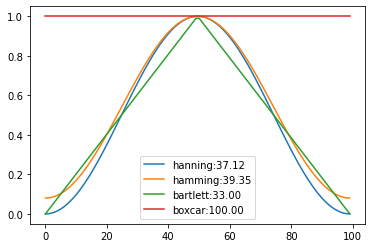

In [41]:
n = 100

windows = {"hanning":np.hanning,
           "hamming":np.hamming, 
           "bartlett":np.bartlett,
           "boxcar":np.ones}
fig, ax = plt.subplots()
for name, wf in windows.items():
    w = wf(n)
    ax.plot(w, label=f"{name}:{np.sum(w**2):.2f}")
ax.legend()

ratios = []
for n in range(100000):
    s = np.random.randn(100)*2
    s -= np.mean(s)
    w = np.hanning(len(s))
    sw = s*w
    #fig, ax = plt.subplots()
    #ax.plot(s)
    #ax.plot(sw)
    #ax.plot(w)
    
    tf = np.fft.fft(s, norm="ortho")
    tfw = np.fft.fft(sw, norm="ortho")
    mod2 = np.real(tf*np.conjugate(tf))
    mod2w = np.real(tfw*np.conjugate(tfw))
    
    ww = np.fft.fft(w)
    ww2 = np.real(ww*np.conjugate(ww))
    
    #fig, ax = plt.subplots()
    #ax.plot(mod2)
    #ax.plot(mod2w)
    #ax.plot(mod2w/(ww2*ww2).mean())
    #print(np.mean(ww2)**2)
    #print((ww2*ww2).mean())
    
    #print(np.mean(w**2))
    #print(np.mean(w)**2)
    #print(np.mean(w**2)/np.mean(w)**2)
    #print(np.mean(w)**2/np.mean(w**2))
    
    #print(np.mean(mod2))
    #print(np.var(s))
#
    #print(np.mean(mod2w))
    #print(np.mean(mod2w)/np.mean(mod2))
    ratios.append((np.mean(w**2),
                  np.mean(mod2w)/np.mean(mod2)))

ratios = np.array(ratios)
print(np.mean(ratios, axis=0))

In [52]:
scipy.signal.periodogram()

TypeError: periodogram() missing 1 required positional argument: 'x'

In [32]:
np.psd?

Object `np.psd` not found.


# Power spectrum

Plusieurs conventions : 
 - énergie d'un signal continu : $$E = \int |x(t)|^2 dt$$
 - énergie d'un signal discret : $$E = \sum |x[n]|^2$$
Par analogie, on peut vouloir écrire que l'énergie d'un signal discret est :
$$E = \sum |x[n]|^2 dt$$
Mais on a alors plus la même unité : 
 - dans cas discret : $E = \sum |x[n]|^2$ somme de $x^2$ donc de dimension $W^2$
 - dans cas continu : $E = \int |x(t)|^2 dt$ somme continue de $|x(t)|^2dt$ donc de dimension $W^2.s$
Pour avoir la même dimension, on peut alors écrire dans le cas discret : 
 - $E = \sum |x[n]|^2 dt $de dimension $W^2.s$

Pour être cohérent en Fourier, il faudra donc ou pas compenser par la fréquence d'échantillonnage

# Real space

Signal sampled
Mean: 2.565182996586639 W
Sum: 320.6478745733299 W
Std: 2.001785964448337 W
Var: 4.007147047462359 W**2
Energy: 4.007147047462359 W**2


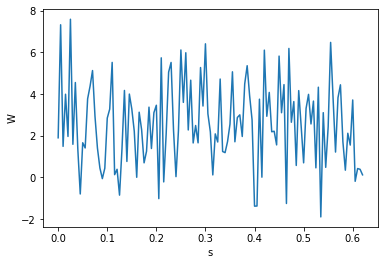

In [49]:
dt = 5*ms
fs = 1/dt
n = 125
ech_t = np.arange(0, n) * dt
ech_t.faunit = ms
#print(ech_t)
ech_s = np.random.normal(loc=2.5, scale=2, size=n) * W
ech_s.favunit = W
#print(ech_s)
#print(ech_t.shape, ech_s.shape)
fig, ax = plt.subplots()
ax.plot(ech_t, ech_s)

print("Signal sampled")
print("Mean:", np.mean(ech_s))
print("Sum:", np.sum(ech_s))
print("Std:", np.std(ech_s))
print("Var:", np.var(ech_s).into(W**2))
print("Energy:", np.var(ech_s).into(W**2))

# Fourier Space

Modulus
Mean: 0.020035735237311794 W**2*s
Sum: 2.5044669046639743 W**2*s
Std: 0.023804704261629218 W**2*s
Var: 0.0005666639449836283 kg**4*m**8/s**10


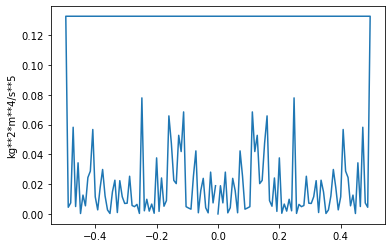

In [50]:
ft = np.fft.fft(ech_s-np.mean(ech_s),
                norm="ortho", # "ortho" : mean is divided by n, sum is divided by n, std is divded by n
               )
mod2 = (ft * np.conjugate(ft)).real/fs
freqs = np.fft.fftfreq(len(ft))
fig, ax = plt.subplots()
ax.plot(freqs, mod2)

print("Modulus")
print("Mean:", np.mean(mod2).into(W**2*s))
print("Sum:", np.sum(mod2).into(W**2*s))
print("Std:", np.std(mod2).into(W**2*s))
print("Var:", np.var(mod2))

Periodogram
Mean: 0.02287347980905706
Sum: 2.8591849761321324
Std: 0.023048635617291847
Var: 0.0005312396038186943


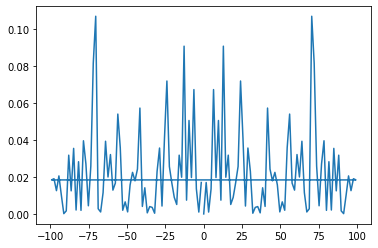

In [142]:
f, pxx = scipy.signal.periodogram(ech_s, 
                         fs=fs.value, 
                         detrend="constant",  # False, "constant":remove mean, "linear"
                         scaling="density", # "spectrum":Pxx in V^2, "density":Pxx in V^2/Hz
                         return_onesided=False,
                        )


# fs=1, detrend=False, scaling="density", return_onesided=False
# equivalent to np.fft.fft(s, norm="ortho")

# fs=fs, detrend=False, scaling="density", return_onesided=False
# equivalent to np.fft/fs
fig, ax = plt.subplots()
ax.plot(f, pxx)
print("Periodogram")
print("Mean:", np.mean(pxx))
print("Sum:", np.sum(pxx))
print("Std:", np.std(pxx))
print("Var:", np.var(pxx))

In [145]:
print("Signal sampled")
print("Mean:", np.mean(ech_s))
print("Std:", np.std(ech_s))
print("Var:", np.var(ech_s).into(W**2))
print("Energy:", n*np.var(ech_s).into(W**2))
print("Modulus")
print("Mean:", np.mean(mod2))
print("Std:", np.std(mod2))
print("Var:", np.var(mod2))
print("Periodogram")
print("Mean:", np.mean(pxx))
print("Std:", np.std(pxx))
print("Var:", np.var(pxx))

Signal sampled
Mean: 2.5923477866606404 W
Std: 2.1388538897763474 W
Var: 4.574695961811412 W**2
Energy: 571.8369952264266 kg**2*m**4/s**6
Modulus
Mean: 0.02287347980905706 kg**2*m**4/s**5
Std: 0.023048635617291844 kg**2*m**4/s**5
Var: 0.0005312396038186942 kg**4*m**8/s**10
Periodogram
Mean: 0.02287347980905706
Std: 0.023048635617291847
Var: 0.0005312396038186943


Relation avec les bruits : 
avoir un bruit avec une certaine variance donne une énergie E=nV
On veut une densité spectrale de puissance de bruit correspondante

In [144]:
scipy.signal.periodogram?

Signature:
scipy.signal.periodogram(
    x,
    fs=1.0,
    window='boxcar',
    nfft=None,
    detrend='constant',
    return_onesided=True,
    scaling='density',
    axis=-1,
)
Docstring:
Estimate power spectral density using a periodogram.

Parameters
----------
x : array_like
    Time series of measurement values
fs : float, optional
    Sampling frequency of the `x` time series. Defaults to 1.0.
window : str or tuple or array_like, optional
    Desired window to use. If `window` is a string or tuple, it is
    passed to `get_window` to generate the window values, which are
    DFT-even by default. See `get_window` for a list of windows and
    required parameters. If `window` is array_like it will be used
    directly as the window and its length must be nperseg. Defaults
    to 'boxcar'.
nfft : int, optional
    Length of the FFT used. If `None` the length of `x` will be
    used.
detrend : str or function or `False`, optional
    Specifies how to detrend each segment. If `detre

In [44]:
from physipy import m, units, s, setup_matplotlib
setup_matplotlib()

In [39]:
import noise3d
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

In [40]:
mu = 2
sigma = 3
seq = noise3d.genseq.genseq_t(1000, 1, 1, mu=mu, sigma=sigma)
seq = np.squeeze(seq)
print(seq.shape)

(1000,)


# periodogram

In [41]:
scipy.signal.periodogram?

Signature:
scipy.signal.periodogram(
    x,
    fs=1.0,
    window='boxcar',
    nfft=None,
    detrend='constant',
    return_onesided=True,
    scaling='density',
    axis=-1,
)
Docstring:
Estimate power spectral density using a periodogram.

Parameters
----------
x : array_like
    Time series of measurement values
fs : float, optional
    Sampling frequency of the `x` time series. Defaults to 1.0.
window : str or tuple or array_like, optional
    Desired window to use. If `window` is a string or tuple, it is
    passed to `get_window` to generate the window values, which are
    DFT-even by default. See `get_window` for a list of windows and
    required parameters. If `window` is array_like it will be used
    directly as the window and its length must be nperseg. Defaults
    to 'boxcar'.
nfft : int, optional
    Length of the FFT used. If `None` the length of `x` will be
    used.
detrend : str or function or `False`, optional
    Specifies how to detrend each segment. If `detre

sum(s) 1998.2136640114168
mean(s) 1.9982136640114168
var(s) 8.789005595195954
var(s)/n 0.008789005595195954

Sum(pxx): 8.789005595195956
Mean(pxx): 0.008789005595195956
pxx[0] 1.9197718989458543e-32


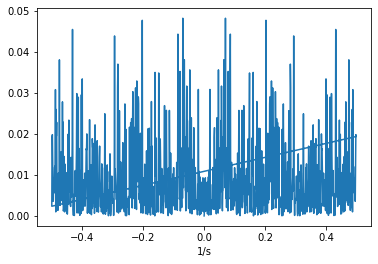

In [70]:
print("sum(s)", np.sum(seq))
print("mean(s)", np.mean(seq))
print("var(s)", np.var(seq))
print("var(s)/n", np.var(seq)/len(seq))

ms = units["ms"]
ti = 5*ms
fs = 1#1/ti.value
f, pxx = scipy.signal.periodogram(seq,
                                  fs=fs, # scale the amplitude, and the frequencies
                                 return_onesided=False, # if real data, only one side is usefull : scale amplitude by 2
                                 detrend="constant", # False, "linear", "constant"
                                  scaling="spectrum", # "density": pxx(V**2/Hz), "spectrum": pxx(V**2)
                                 )
#print(seq.shape)
#print(f.shape)
#print(pxx.shape)
fig, ax = plt.subplots()
ax.plot(f*1/s, pxx)
print()
print("Sum(pxx):", np.sum(pxx))
print("Mean(pxx):", np.mean(pxx))
print("pxx[0]", pxx[0])